In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('clean_data.csv', index_col=[0])
print(df.size)
df.head()

6140693


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,saleyear
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,21500,2014
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,21500,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,30000,2015
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,27750,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,67000,2014


### find number of cars in each year

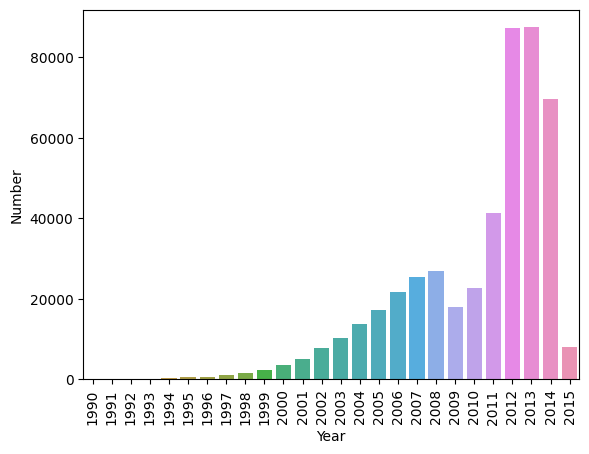

In [59]:
df_year = df.groupby(['year']).count()
df_year = df_year.reset_index()
ax = sns.barplot(y=df_year['make'],x=df_year['year'])
ax.set(xlabel='Year', ylabel='Number')
ax.tick_params(axis='x', rotation=90)
plt.show()

### find number of cars in each outside color

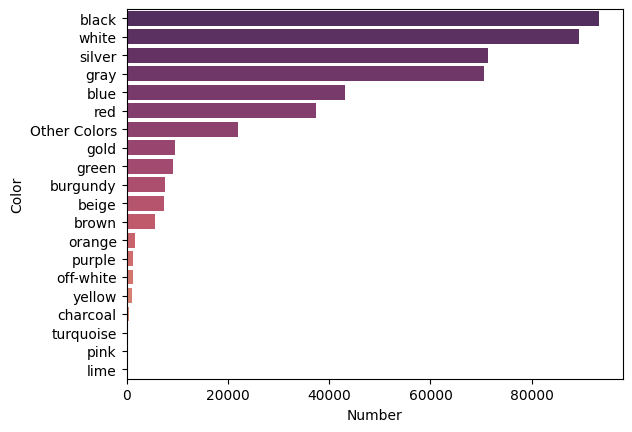

In [123]:
df_color = df.groupby(['color']).count()
df_color = df_color.reset_index()
df_color = df_color.sort_values(by=['make'],ascending=False)
df_color.at[19,'color'] = "Other Colors"
ax = sns.barplot(x=df_color['make'],y=df_color['color'], palette="flare_r", orient = 'h')
ax.set(ylabel='Color', xlabel='Number')
ax.tick_params(axis='x', rotation=0)
plt.show()

# average price for each outside color

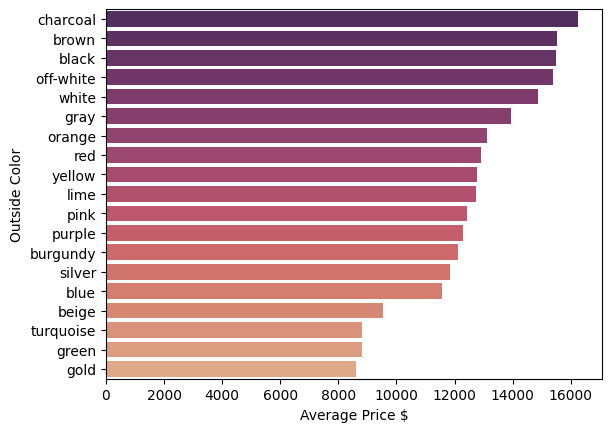

In [125]:
df_outcolor_price = df.groupby(['color']).mean()
df_outcolor_price = df_outcolor_price.reset_index()
df_outcolor_price = df_outcolor_price.sort_values(by=['sellingprice'],ascending=False)
df_outcolor_price = df_outcolor_price[1:]
ax = sns.barplot(x=df_outcolor_price['sellingprice'],y=df_outcolor_price['color'], palette="flare_r", orient = 'h')
ax.set(ylabel='Outside Color', xlabel='Average Price $')
ax.tick_params(axis='x', rotation=0)
plt.show()

# average price for each interior color

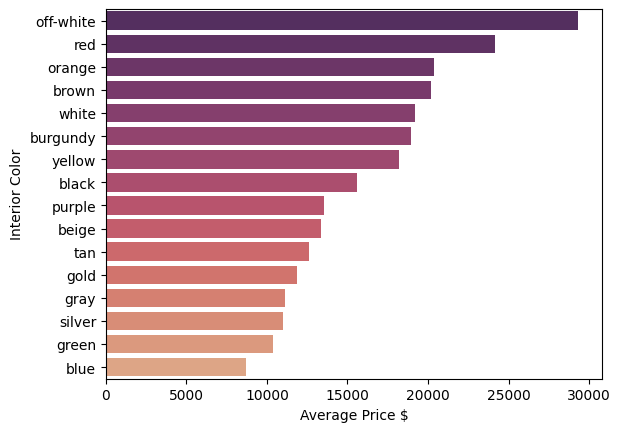

In [126]:
df_colorin_price = df.groupby(['interior']).mean()
df_colorin_price = df_colorin_price.reset_index()
df_colorin_price = df_colorin_price.sort_values(by=['sellingprice'],ascending=False)
df_colorin_price = df_colorin_price.drop(16)
ax = sns.barplot(x=df_colorin_price['sellingprice'],y=df_colorin_price['interior'], palette="flare_r", orient = 'h')
ax.set(ylabel='Interior Color', xlabel='Average Price $')
ax.tick_params(axis='x', rotation=0)
plt.show()

### Analysis on Condition

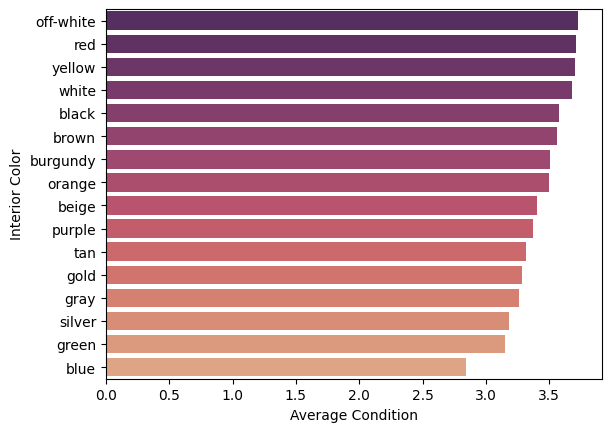

In [138]:
df_color_condition = df.groupby(['interior']).mean()
df_color_condition = df_color_condition.reset_index()
df_color_condition = df_color_condition.sort_values(by=['condition'],ascending=False)
df_color_condition = df_color_condition.drop(16)
ax = sns.barplot(x=df_color_condition['condition'],y=df_color_condition['interior'], palette="flare_r", orient = 'h')
ax.set(ylabel='Interior Color', xlabel='Average Condition')
ax.tick_params(axis='x', rotation=0)
plt.show()

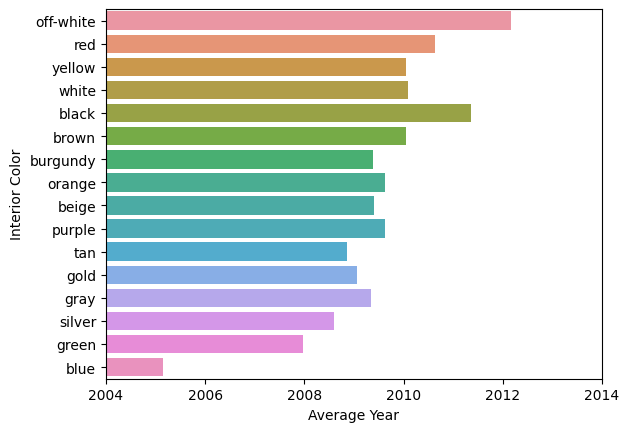

In [137]:
ax = sns.barplot(x=df_color_condition['year'],y=df_color_condition['interior'])
ax.set(ylabel='Interior Color', xlabel='Average Year')
ax.tick_params(axis='x', rotation=0)
ax.set(xlim=(2004, 2014))
plt.show()

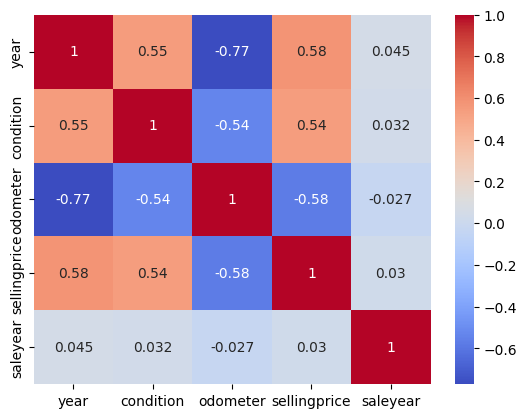

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.show() 